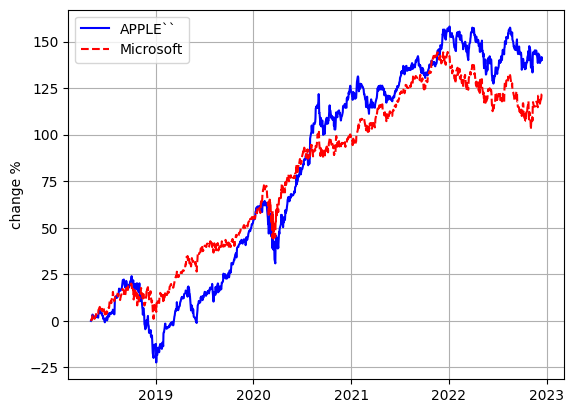

In [38]:
# APPL, MSFT 주식 수익률 비교
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2018-05-04", progress = False)
aapl_dpc = (aapl["Close"]-aapl['Close'].shift(1)) / aapl['Close'].shift(1) * 100
aapl_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
aapl_dpc_cs = aapl_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT',start="2018-05-04", progress = False)
msft_dpc = (msft["Close"]-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.plot(aapl.index, aapl_dpc_cs, 'b', label="APPLE``")
plt.plot(msft.index, msft_dpc_cs, 'r--', label="Microsoft")
plt.ylabel("change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()

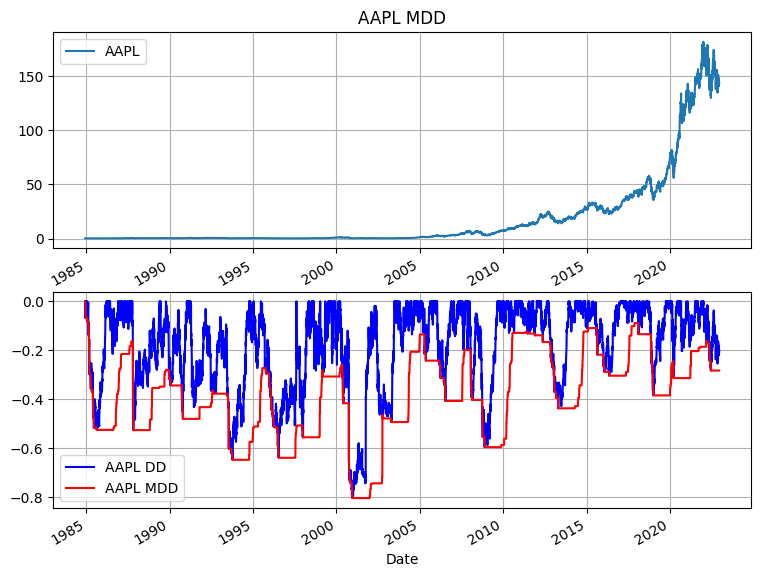

Date
2000-12-19   -0.805808
2000-12-20   -0.805808
2000-12-21   -0.805808
2000-12-22   -0.805808
2000-12-26   -0.805808
                ...   
2001-12-18   -0.805808
2001-12-19   -0.805808
2001-12-20   -0.805808
2001-12-21   -0.805808
2001-12-24   -0.805808
Name: Adj Close, Length: 252, dtype: float64

In [39]:
# Max Draw Down 최대 손실 낙폭
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()


# 1984년 12월 01일부터 AAPL데이터를 불러온다.
aapl = pdr.get_data_yahoo("aapl", "1984-12-01", progress = False)

window = 252 # 어림잡아 1년동안 개장일
peak = aapl['Adj Close'].rolling(window, min_periods=1).max()
drawdown = aapl['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
aapl["Close"].plot(label="AAPL",title="AAPL MDD", grid=True, legend=True)
plt.subplot(212) # 2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label="AAPL DD", grid=True, legend=True)
max_dd.plot(c="red", label="AAPL MDD", grid=True, legend=True)
plt.show()

# 최대 낙폭은 약 80% 정도로 볼 수 있다.
max_dd[max_dd == max_dd.min()]

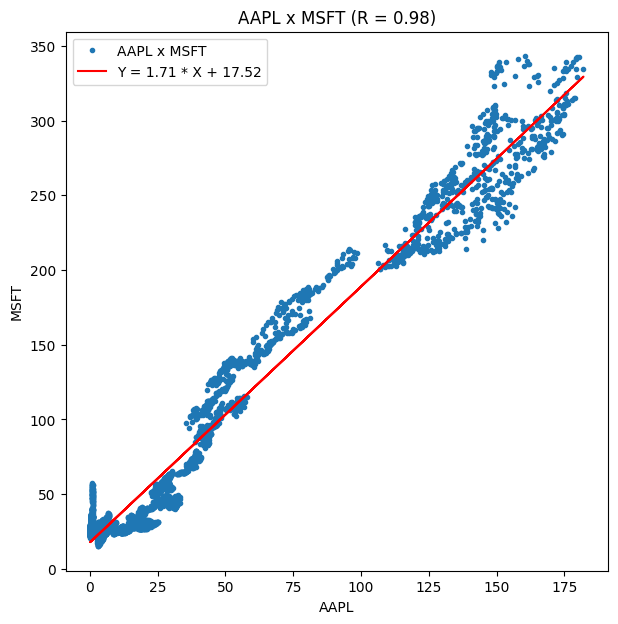

,X,Y
X,1.000000,0.980663
Y,0.980663,1.000000


In [40]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats
import matplotlib.pylab as plt
yf.pdr_override()

AAPL = pdr.get_data_yahoo("AAPL","2000-01-04", progress = False)
MSFT = pdr.get_data_yahoo("MSFT","2000-01-04", progress = False)

df = pd.DataFrame({"X": AAPL["Close"], "Y": MSFT["Close"]})
df = df.fillna(method="bfill")
df = df.fillna(method="ffill")

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, ".")
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(["AAPL x MSFT", regr_line])
plt.title(f"AAPL x MSFT (R = {regr.rvalue:.2f})")
plt.xlabel("AAPL")
plt.ylabel("MSFT")
plt.show()

# AAPL과 MSFT의 상관계수가 0.98로 매우 높은 것을 볼 수 있다.
df.corr()

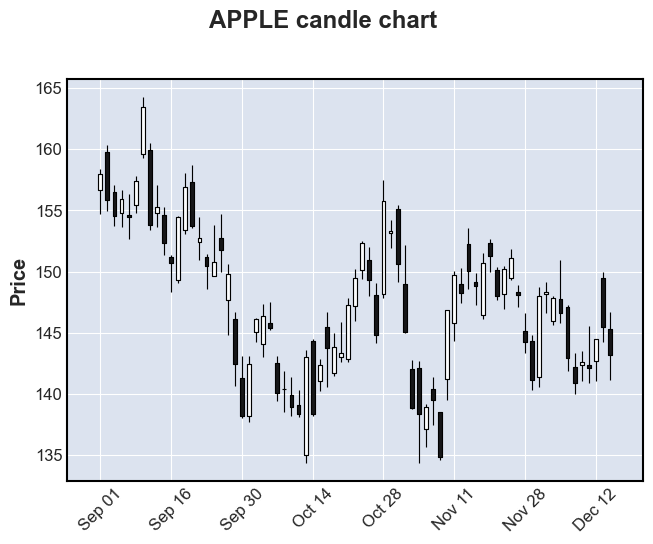

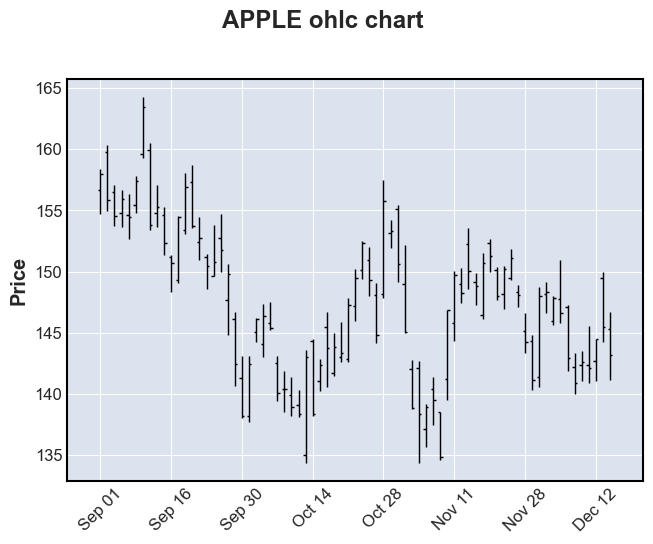

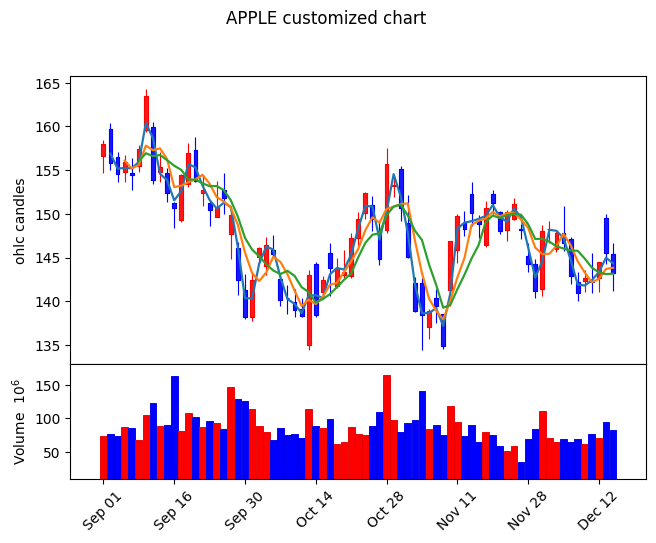

In [41]:
# AAPL 캔들차트 그리기
from pandas_datareader import data as pdr
import yfinance as yf
import mplfinance as mpf
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2022-09-01", progress = False)
mpf.plot(aapl, title='APPLE candle chart', type='candle')
mpf.plot(aapl, title='APPLE ohlc chart', type='ohlc')
kwargs = dict(title='APPLE customized chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(aapl, **kwargs, style=s)

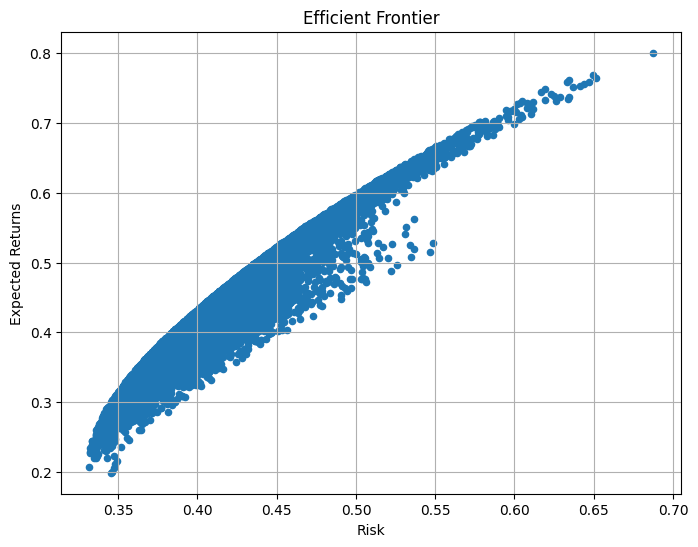

In [49]:
# Efficient Frontier 효율적 투자선
# 주어진 리스크에서 최대 수익을 낸다.
# 포트폴리오 리스크 = (종목별 비중)T((종목별 연간 공분산)(종목별 비중))^1/2
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()
yf.pdr_override()
stocks = ["AAPL", "GOOGL", "TSLA", "NVDA"]
for i in stocks:
    df[i] = pdr.get_data_yahoo(i, start="2020-01-01", progress = False)['Close']

daily_ret = df.pct_change() # 일간 변동률
annual_ret = daily_ret.mean() * 252 # 연간 수익률
daily_cov = daily_ret.cov() # 일간 리스크
annual_cov = daily_cov * 252 # 연간 리스크

port_ret = []
port_risk = []
port_weights = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

df.plot.scatter(x='Risk', y='Returns', figsize=(8,6), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()